In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('data(4).csv', sep=';')
data.columns = data.iloc[1]
data = data.drop([0, 1])

In [3]:
data.columns = ['Code', 'Libellé', 'Cat', 'Evolution_SAU', 'Urbain', 'Zone humide', 'Forets', 'Agri', 'Superficie', 'Conso_ENAF', 'Population']

count    34935.000000
mean         7.386632
std          5.442704
min          0.000000
25%          4.000000
50%          6.000000
75%          9.000000
max        135.000000
Name: Cat, dtype: float64


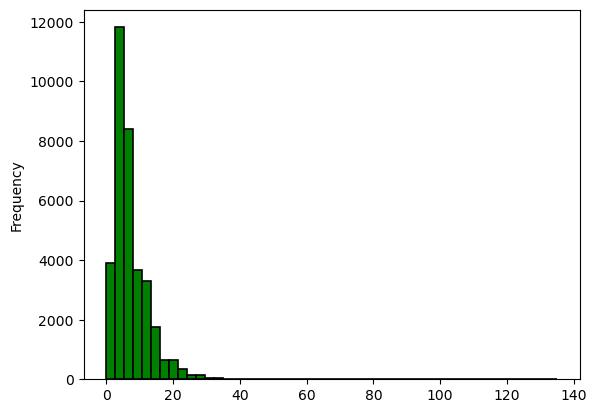

In [4]:
data.iloc[:,2].astype(float).plot(kind='hist', bins=50, color='green', edgecolor='black', linewidth=1.2)
print(data.iloc[:,2].astype(float).describe())

In [5]:
data = data[data.Evolution_SAU != 'N/A - résultat non disponible']
data = data[data.Evolution_SAU != 'N/A - division par 0']

data = data[data.Conso_ENAF != 'N/A - division par 0']
data = data[data.Conso_ENAF != 'N/A - résultat non disponible']
data = data[data.Urbain != 'N/A - division par 0']
data = data[data.Urbain != 'N/A - résultat non disponible']
data = data[data.Superficie != 'N/A - division par 0']
data = data[data.Superficie != 'N/A - résultat non disponible']
data = data[data.Population != 'N/A - division par 0']
data = data[data.Population != 'N/A - résultat non disponible']

#plot the mean of the columns 3 for each decile of the column 2
data.Cat = data.Cat.astype(float)
data.Evolution_SAU = data.Evolution_SAU.astype(float)
data.Urbain = data.Urbain.astype(float)
data['Zone humide'] = data['Zone humide'].astype(float)
data.Forets = data.Forets.astype(float)
data.Agri = data.Agri.astype(float)
data.Superficie = data.Superficie.astype(float)
data.Conso_ENAF = data.Conso_ENAF.astype(float)
data.Population = data.Population.astype(float)
data['Conso_ENAF_sup'] = data['Conso_ENAF']/data['Superficie']
data['densite'] = data['Population']/data['Superficie']
data['Cat_sup'] = data['Cat']/data['Superficie']
data['Cat_pop'] = data['Cat']/data['Population']
deciles = pd.qcut(data.loc[:,'Cat_sup'], 10, labels=False)
data['decile'] = deciles

In [6]:
#group by decile and calculate the mean of column 3
data_plot = data[['decile', 'Superficie', 'Population', 'Conso_ENAF', 'Cat', 'Cat_sup', 'Cat_pop', 'Conso_ENAF_sup', 'densite']]

data_plot = data_plot.groupby('decile').mean()

Text(0.5, 0, 'Decile of Natural Hazard Declared/km2')

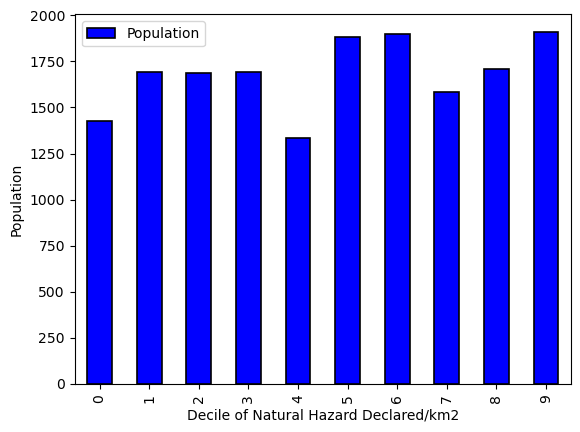

In [7]:
data_plot.plot(y='Population', kind='bar', color='blue', edgecolor='black', linewidth=1.2)
plt.ylabel('Population')
plt.xlabel('Decile of Natural Hazard Declared/km2')

Text(0.5, 0, 'Decile of Natural Hazard Declared per km2')

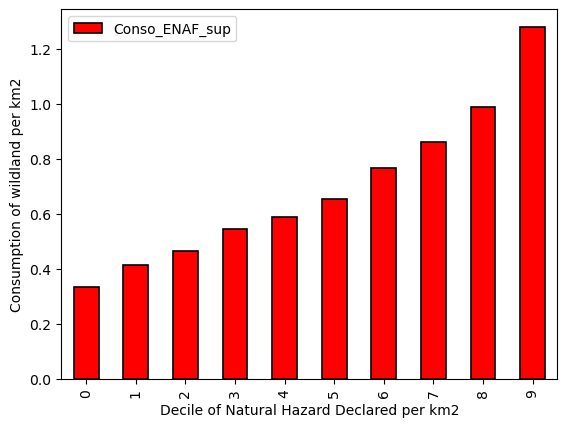

In [8]:
#same for column 3
data_plot.plot(y='Conso_ENAF_sup', kind='bar', color='red', edgecolor='black', linewidth=1.2)
plt.ylabel('Consumption of wildland per km2')
plt.xlabel('Decile of Natural Hazard Declared per km2')


In [9]:
df_conso = pd.read_csv('conso2009-2023-resultats-com.csv', sep=';')

C:\Users\colin\AppData\Local\Temp\ipykernel_7084\2894030197.py:1: DtypeWarning: Columns (0,4,6) have mixed types. Specify dtype option on import or set low_memory=False.
  df_conso = pd.read_csv('conso2009-2023-resultats-com.csv', sep=';')


In [10]:
cols = ['artcom0923','art09hab23', 'idcom']

#merge data on Code and idcom
data['Code'] = data['Code'].astype(str)
df_conso['artcom0923'] = df_conso['artcom0923'].astype(str)
df_conso = df_conso[cols]

In [11]:
#the number with only 4 digits need to be completed with 0 at the beginning
df_conso['idcom'] = df_conso['idcom'].apply(lambda x: '0'+str(x) if len(str(x)) == 4 else str(x) )


In [38]:
df = data.merge(df_conso, left_on='Code', right_on='idcom')

In [39]:
#check the coevolution of Conso_ENAF/Superficie and art09hab23
df['artcom0923'] = df['artcom0923'].astype(float)
df['art09hab23'] = df['art09hab23'].astype(float)
df['art09hab23'] = df['art09hab23']/df['Superficie']/1e4

Text(0, 0.5, 'Population growth rate')

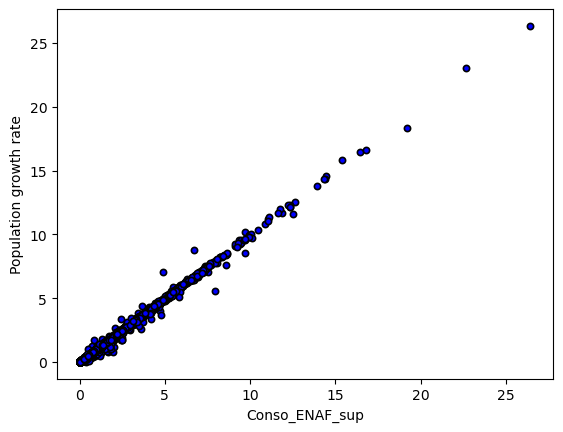

In [14]:
df.plot(x='Conso_ENAF_sup', y='artcom0923', kind='scatter', color='blue', edgecolor='black', linewidth=1.2)
plt.ylabel('Population growth rate')

Text(0.5, 1.0, 'The slope of the regression is 0.3')

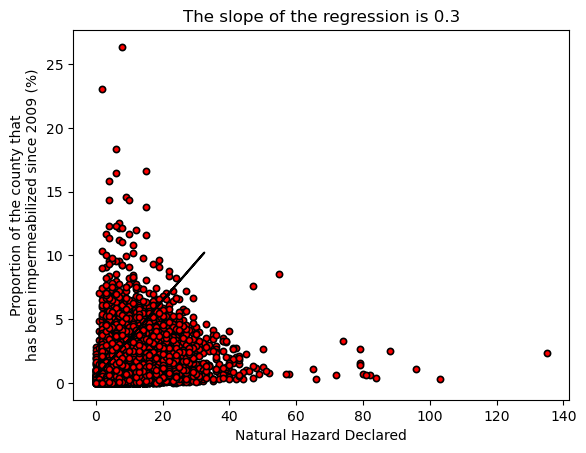

In [15]:
df.plot(x='Cat', y='artcom0923', kind='scatter', color='red', edgecolor='black', linewidth=1.2)
#add the linear regression
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(df[['Cat_sup']], df['artcom0923'])
a = model.coef_
b = model.intercept_
plt.plot(df['Cat_sup'], a*df['Cat_sup']+b, color='black')
plt.ylabel('Proportion of the county that\nhas been impermeabilized since 2009 (%)')
plt.xlabel('Natural Hazard Declared')
#print in the title the slope
plt.title('The slope of the regression is '+str(round(a[0], 3)))



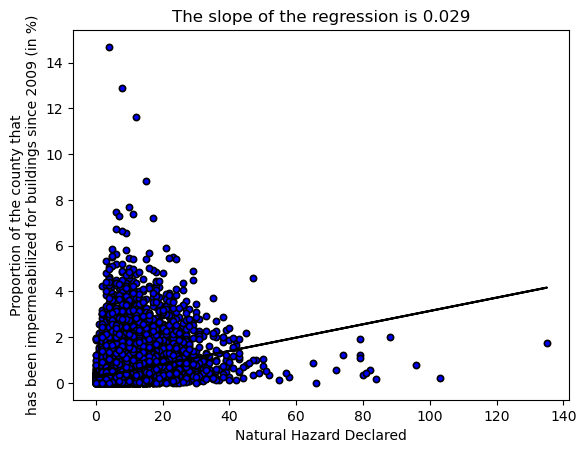

In [16]:
df.plot(x='Cat', y='art09hab23', kind='scatter', color='blue', edgecolor='black', linewidth=1.2)
#add the linear regression
model = LinearRegression()
model.fit(df[['Cat']], df['art09hab23'])
a = model.coef_
b = model.intercept_
plt.plot(df['Cat'], a*df['Cat']+b, color='black')
plt.ylabel('Proportion of the county that\nhas been impermeabilized for buildings since 2009 (in %)')
plt.xlabel('Natural Hazard Declared')

#print in the title the slope
plt.title('The slope of the regression is '+str(round(a[0], 3)))
plt.show()


In [17]:
import geopandas as gpd

In [68]:
shp = gpd.read_file('C:/Users/colin/Downloads/communes-20220101-shp/communes-20220101.shp')
data_new = pd.read_csv('indicesQ50_25021114242922763.txt', sep=';', comment='#', header=None)
data_new.columns = ['index', 'lat', 'lon', 'scenario', 'tasmax', 'day30', 'pr_cum', 'wf_risk', 'droughts_day', 'nan']
data_new = data_new.drop('nan', axis=1)

In [69]:
shp = shp[shp.insee.isin(df['Code'])]
#map the data_new to each county in the shapefile based on the closest lat lon
from scipy.spatial import distance
def closest_node(node, nodes):
    closest_index = distance.cdist([node], nodes).argmin()
    return closest_index

shp_bis = shp.copy()
shp_bis['lat'] = shp_bis.geometry.centroid.y
shp_bis['lon'] = shp_bis.geometry.centroid.x
shp_bis['index'] = shp_bis.apply(lambda x: closest_node([x['lat'], x['lon']], data_new[['lat', 'lon']].values), axis=1)



C:\Users\colin\AppData\Local\Temp\ipykernel_7084\4556759.py:9: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  shp_bis['lat'] = shp_bis.geometry.centroid.y
C:\Users\colin\AppData\Local\Temp\ipykernel_7084\4556759.py:10: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  shp_bis['lon'] = shp_bis.geometry.centroid.x


In [72]:
shp_bis['pr_cum'] = shp_bis['index'].apply(lambda x: data_new.loc[x, 'pr_cum'])
shp_bis['tasmax'] = shp_bis['index'].apply(lambda x: data_new.loc[x, 'tasmax'])
shp_bis['wf_risk'] = shp_bis['index'].apply(lambda x: data_new.loc[x, 'wf_risk'])
shp_bis['droughts_day'] = shp_bis['index'].apply(lambda x: data_new.loc[x, 'droughts_day'])
shp_bis['day30'] = shp_bis['index'].apply(lambda x: data_new.loc[x, 'day30'])

In [73]:
df = df.merge(shp_bis[['insee', 'pr_cum', 'tasmax', 'wf_risk', 'droughts_day', 'day30']], left_on='Code', right_on='insee')

Text(0.5, 1.0, 'Temperature max')

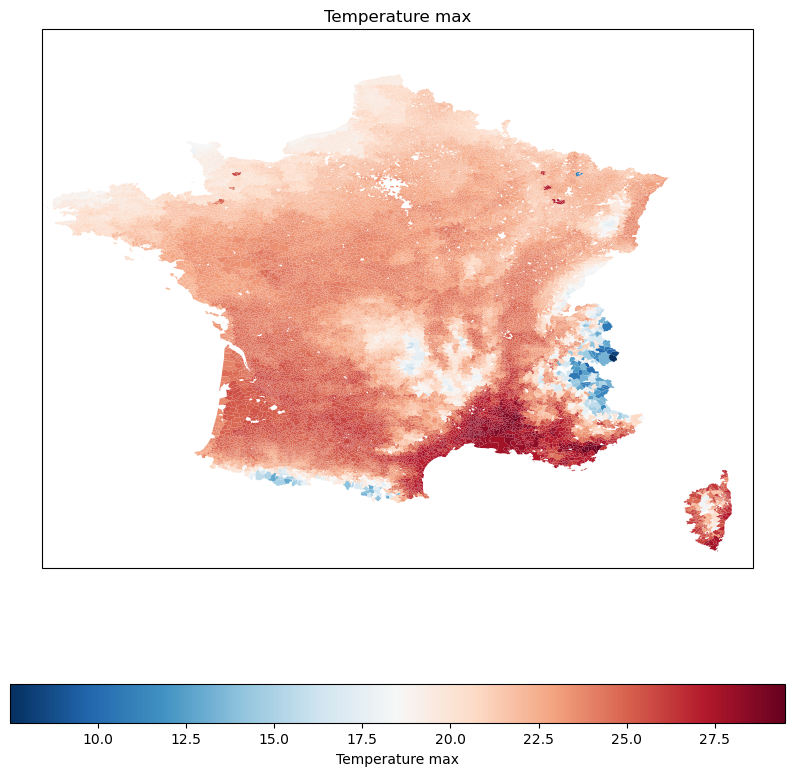

In [112]:
#plot the quantiles of tasmax
import cartopy.crs as ccrs
import cartopy.feature as cfeature

fig,ax = plt.subplots(1,1, figsize=(10,10), subplot_kw={'projection': ccrs.PlateCarree()})
shp_bis.plot(column='tasmax', legend=True, cmap='RdBu_r', ax=ax, linewidth=1.2, transform=ccrs.PlateCarree(), legend_kwds={'orientation': 'horizontal', 'label': 'Temperature max'})
ax.set_extent([-5, 10, 41, 52], crs=ccrs.PlateCarree())
ax.set_title('Temperature max')


Text(0.5, 1.0, 'Days above 30°C')

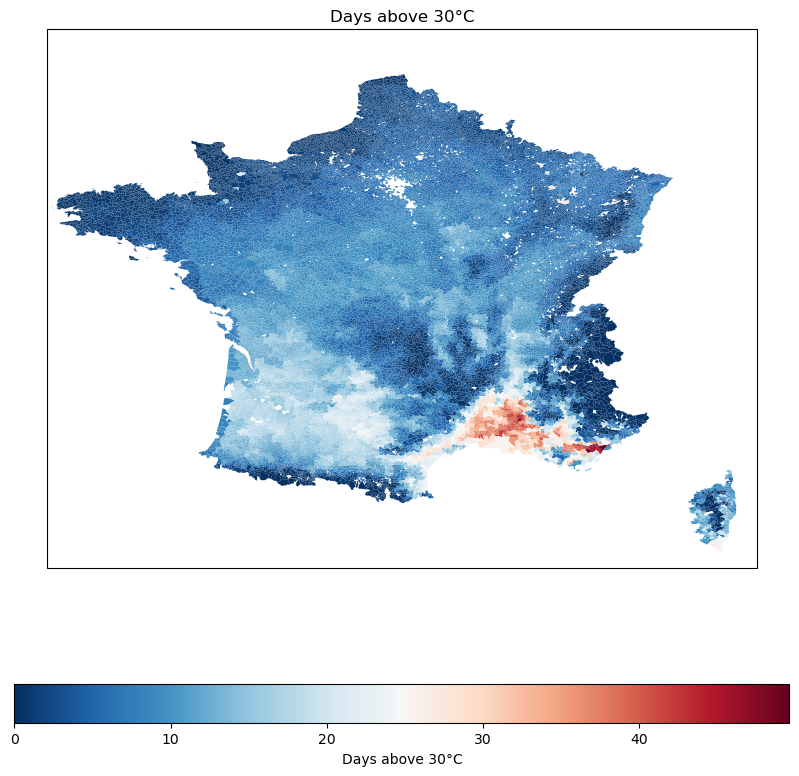

In [113]:
#plot the quantiles of tasmax
import cartopy.crs as ccrs
import cartopy.feature as cfeature

fig,ax = plt.subplots(1,1, figsize=(10,10), subplot_kw={'projection': ccrs.PlateCarree()})
shp_bis.plot(column='day30', legend=True, cmap='RdBu_r', ax=ax, linewidth=1.2, transform=ccrs.PlateCarree(), legend_kwds={'orientation': 'horizontal', 'label': 'Days above 30°C'})
ax.set_extent([-5, 10, 41, 52], crs=ccrs.PlateCarree())
ax.set_title('Days above 30°C')

Text(0.5, 1.0, 'Extreme Precipitation')

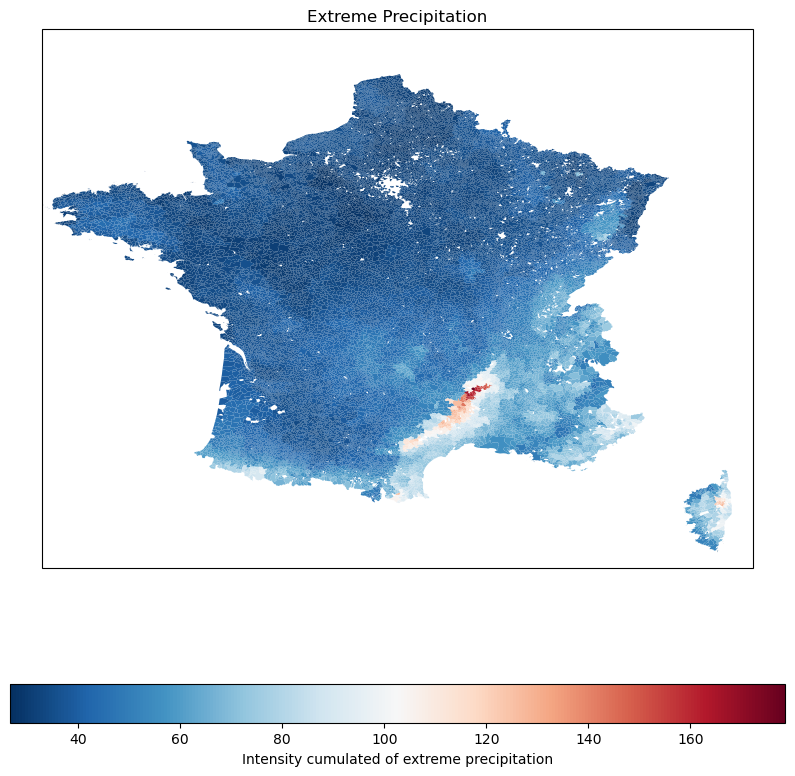

In [115]:
#plot the quantiles of tasmax
import cartopy.crs as ccrs
import cartopy.feature as cfeature

fig,ax = plt.subplots(1,1, figsize=(10,10), subplot_kw={'projection': ccrs.PlateCarree()})
shp_bis.plot(column='pr_cum', legend=True, cmap='RdBu_r', ax=ax, linewidth=1.2, transform=ccrs.PlateCarree(), legend_kwds={'orientation': 'horizontal', 'label': 'Intensity cumulated of extreme precipitation'})
ax.set_extent([-5, 10, 41, 52], crs=ccrs.PlateCarree())
ax.set_title('Extreme Precipitation')

Text(0.5, 1.0, 'Droughts Day Annual Frequency')

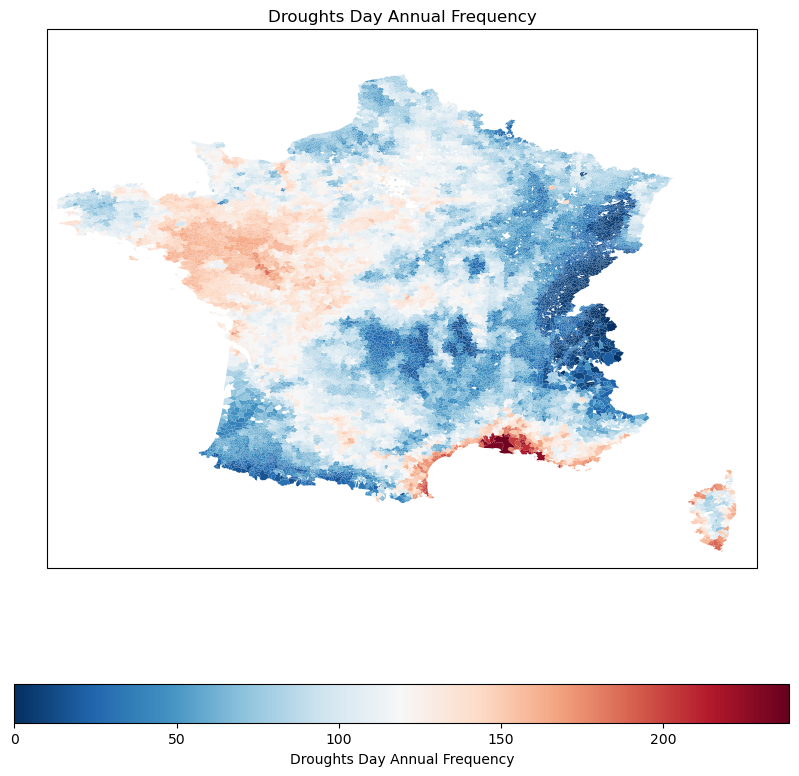

In [116]:
#plot the quantiles of tasmax
import cartopy.crs as ccrs
import cartopy.feature as cfeature

fig,ax = plt.subplots(1,1, figsize=(10,10), subplot_kw={'projection': ccrs.PlateCarree()})
shp_bis.plot(column='droughts_day', legend=True, cmap='RdBu_r', ax=ax, linewidth=1.2, transform=ccrs.PlateCarree(), legend_kwds={'orientation': 'horizontal', 'label': 'Droughts Day Annual Frequency'})
ax.set_extent([-5, 10, 41, 52], crs=ccrs.PlateCarree())
ax.set_title('Droughts Day Annual Frequency')

Text(0.5, 1.0, 'Wildfire Risk')

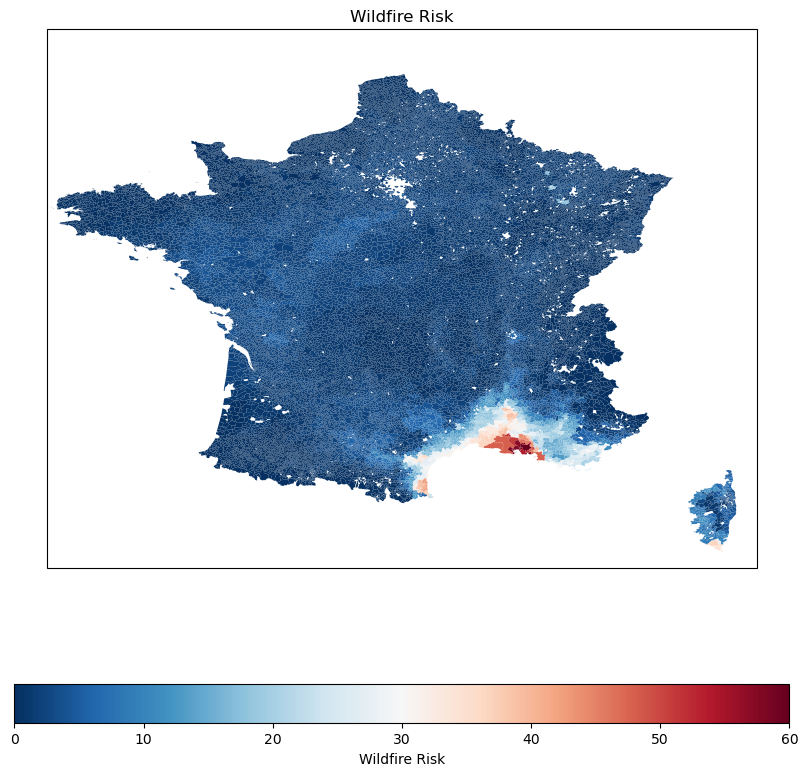

In [117]:
#plot the quantiles of tasmax
import cartopy.crs as ccrs
import cartopy.feature as cfeature

fig,ax = plt.subplots(1,1, figsize=(10,10), subplot_kw={'projection': ccrs.PlateCarree()})
shp_bis.plot(column='wf_risk', legend=True, cmap='RdBu_r', ax=ax, linewidth=1.2, transform=ccrs.PlateCarree(), legend_kwds={'orientation': 'horizontal', 'label': 'Wildfire Risk'})
ax.set_extent([-5, 10, 41, 52], crs=ccrs.PlateCarree())
ax.set_title('Wildfire Risk')

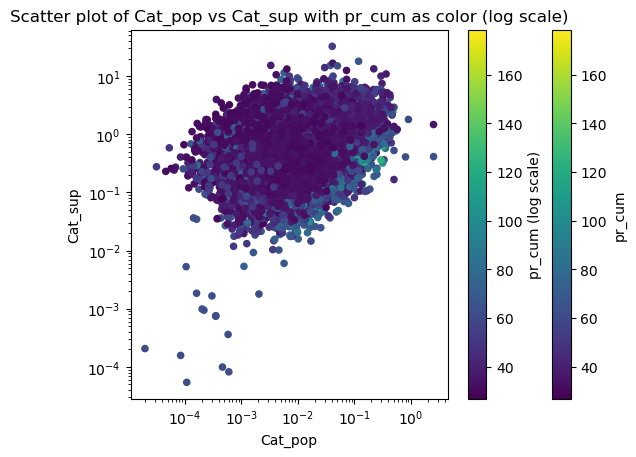

In [96]:
scatter = df.plot.scatter(x='Cat_pop', y='Cat_sup', c='pr_cum', colormap='viridis', logy=True, logx=True)
plt.colorbar(scatter.collections[0], label='pr_cum (log scale)')
plt.xlabel('Cat_pop')
plt.ylabel('Cat_sup')
plt.title('Scatter plot of Cat_pop vs Cat_sup with pr_cum as color (log scale)')
plt.show()

c:\Users\colin\anaconda3\envs\xarray_env\Lib\site-packages\pandas\plotting\_matplotlib\core.py:1345: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


Text(0, 0.5, 'pr_cum')

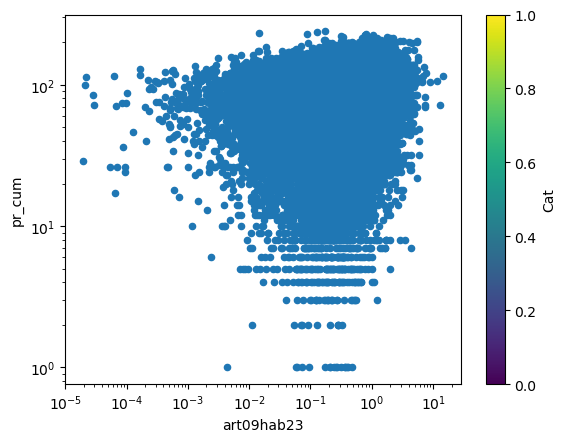

In [101]:
scatter = df.plot.scatter(x='art09hab23', y='droughts_day', colormap='viridis', logy=True, logx=True)
plt.colorbar(scatter.collections[0], label='Cat')
plt.xlabel('art09hab23')
plt.ylabel('pr_cum')


Text(0.5, 0, 'Decile of tasmax')

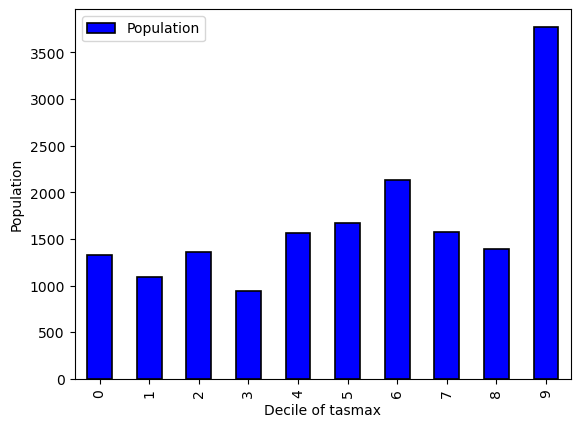

In [108]:
df['decile_tasmax'] = pd.qcut(df['tasmax'], 10, labels=False)

df_plot = df[['decile_tasmax', 'Conso_ENAF', 'Population', 'Superficie', 'Cat', 'Cat_sup', 'Cat_pop', 'Conso_ENAF_sup', 'densite']]
df_plot = df_plot.groupby('decile_tasmax').mean()

df_plot.plot(y='Population', kind='bar', color='blue', edgecolor='black', linewidth=1.2)
plt.ylabel('Population')
plt.xlabel('Decile of tasmax')

Text(0.5, 0, 'Decile of Max Temperature in Summer')

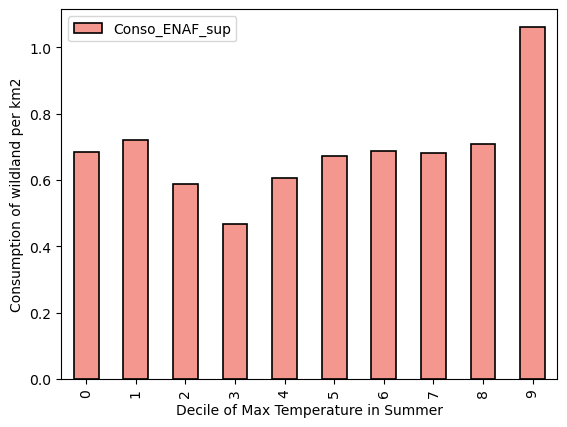

In [109]:
df_plot.plot(y='Conso_ENAF_sup', kind='bar', color='#f4978e', edgecolor='black', linewidth=1.2)
plt.ylabel('Consumption of wildland per km2')
plt.xlabel('Decile of Max Temperature in Summer')

C:\Users\colin\AppData\Local\Temp\ipykernel_7084\1308895474.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_plot['decile_day30'] = pd.qcut(df_plot['day30'], 10, labels=False)


Text(0.5, 0, 'Days above 30°C')

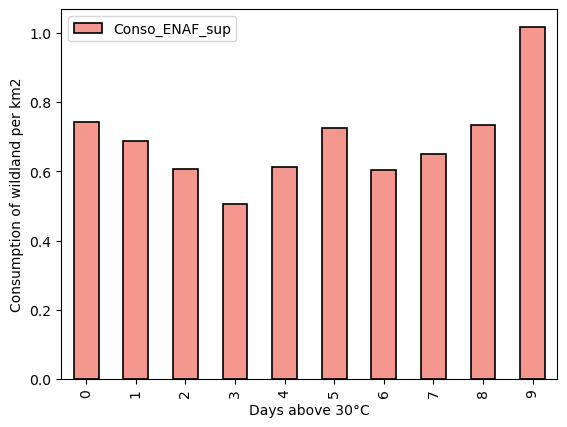

In [106]:
df_plot = df[['day30', 'Conso_ENAF', 'Population', 'Superficie', 'Cat', 'Cat_sup', 'Cat_pop', 'Conso_ENAF_sup', 'densite','art09hab23']]
df_plot['decile_day30'] = pd.qcut(df_plot['day30'], 10, labels=False)
df_plot = df_plot.groupby('decile_day30').mean()


df_plot.plot(y='Conso_ENAF_sup', kind='bar', color='#f4978e', edgecolor='black', linewidth=1.2)
plt.ylabel('Consumption of wildland per km2')
plt.xlabel('Days above 30°C')


C:\Users\colin\AppData\Local\Temp\ipykernel_7084\2954949840.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_plot['decile_pr_cum'] = pd.qcut(df_plot['pr_cum'], 10, labels=False)


Text(0.5, 0, 'Decile of pr_cum')

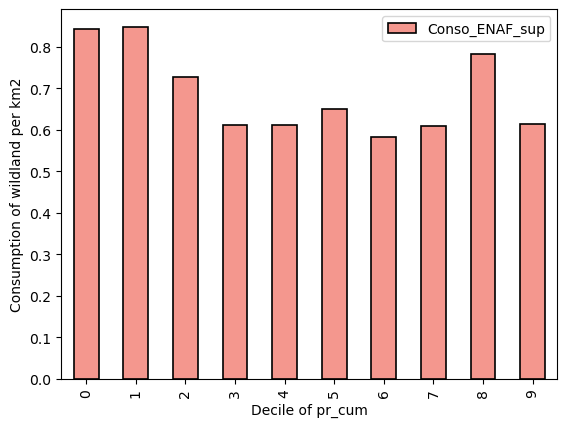

In [83]:
df_plot = df[['pr_cum', 'Conso_ENAF', 'Population', 'Superficie', 'Cat', 'Cat_sup', 'Cat_pop', 'Conso_ENAF_sup', 'densite']]
df_plot['decile_pr_cum'] = pd.qcut(df_plot['pr_cum'], 10, labels=False)
df_plot = df_plot.groupby('decile_pr_cum').mean()

df_plot.plot(y='Conso_ENAF_sup', kind='bar', color='#f4978e', edgecolor='black', linewidth=1.2)
plt.ylabel('Consumption of wildland per km2')
plt.xlabel('Decile of pr_cum')


C:\Users\colin\AppData\Local\Temp\ipykernel_7084\4272091076.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_plot['decile_pr_cum'] = pd.qcut(df_plot['pr_cum'], 10, labels=False)


Text(0.5, 0, 'Decile of pr_cum')

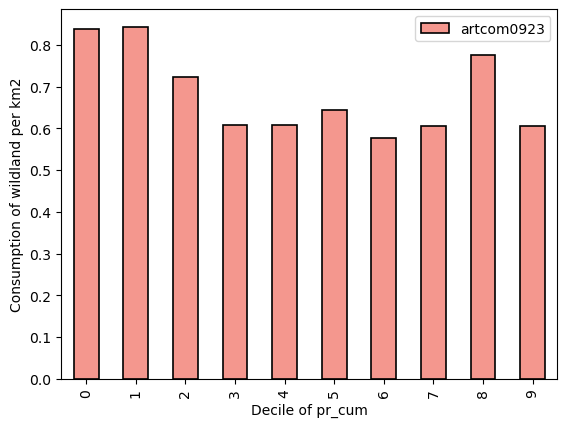

In [103]:
df_plot = df[['pr_cum', 'Conso_ENAF', 'Population', 'Superficie', 'Cat', 'Cat_sup', 'Cat_pop', 'Conso_ENAF_sup', 'densite', 'artcom0923', 'art09hab23']]
df_plot['decile_pr_cum'] = pd.qcut(df_plot['pr_cum'], 10, labels=False)
df_plot = df_plot.groupby('decile_pr_cum').mean()

df_plot.plot(y='artcom0923', kind='bar', color='#f4978e', edgecolor='black', linewidth=1.2)
plt.ylabel('Consumption of wildland per km2')
plt.xlabel('Decile of pr_cum')


In [87]:
df.columns

Index(['Code', 'Libellé', 'Cat', 'Evolution_SAU', 'Urbain', 'Zone humide',
       'Forets', 'Agri', 'Superficie', 'Conso_ENAF', 'Population',
       'Conso_ENAF_sup', 'densite', 'Cat_sup', 'Cat_pop', 'decile',
       'artcom0923', 'art09hab23', 'idcom', 'insee_x', 'pr_day_x', 'tasmax_x',
       'wf_risk_x', 'droughts_day_x', 'decile_tasmax', 'insee_y', 'pr_day_y',
       'tasmax_y', 'wf_risk_y', 'droughts_day_y', 'insee', 'pr_cum', 'tasmax',
       'wf_risk', 'droughts_day', 'day30'],
      dtype='object')

C:\Users\colin\AppData\Local\Temp\ipykernel_7084\2111096437.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_plot['decile_droughts'] = pd.qcut(df_plot['droughts_day'], 10, labels=False, duplicates='drop')


Text(0.5, 0, 'Decile of droughts frequency')

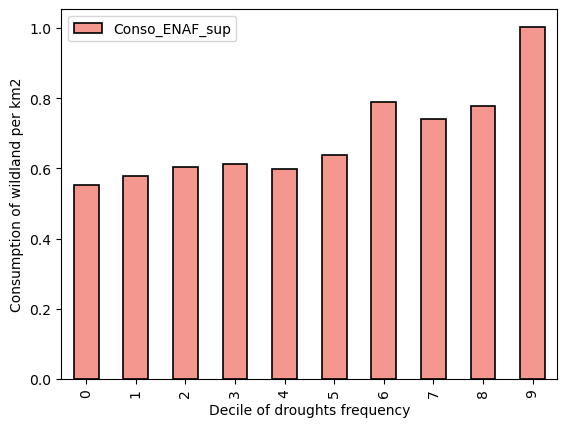

In [53]:
df_plot = df[['droughts_day', 'Population', 'Superficie', 'Cat', 'Cat_sup', 'Cat_pop', 'Conso_ENAF_sup', 'densite']]
df_plot['decile_droughts'] = pd.qcut(df_plot['droughts_day'], 10, labels=False, duplicates='drop')
df_plot = df_plot.groupby('decile_droughts').mean()

df_plot.plot(y='Conso_ENAF_sup', kind='bar', color='#f4978e', edgecolor='black', linewidth=1.2)
plt.ylabel('Consumption of wildland per km2')
plt.xlabel('Decile of droughts frequency')

<Axes: ylabel='Frequency'>

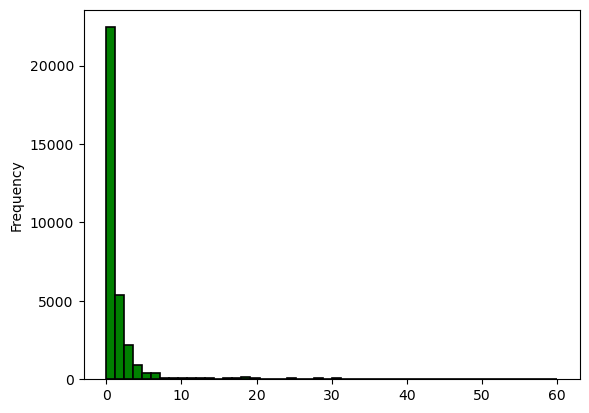

In [56]:
df.wf_risk.plot.hist(bins=50, color='green', edgecolor='black', linewidth=1.2)

In [58]:
df_plot

,wf_risk,Population,Superficie,Cat,Cat_sup,Cat_pop,Conso_ENAF_sup,densite
decile_wf,,,,,,,,
0,0.516063,1266.709887,18.286018,6.362117,0.739789,0.023121,0.632573,101.838062
1,2.000000,1631.585266,17.172796,8.354797,0.775396,0.020998,0.694621,123.810839
2,3.000000,2498.344604,21.782446,9.634553,0.698788,0.020332,0.825101,135.940604
3,12.347117,4041.115303,21.305554,11.126773,0.937537,0.021562,0.961938,172.400116


C:\Users\colin\AppData\Local\Temp\ipykernel_7084\3421599317.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_plot['decile_wf'] = pd.qcut(df_plot['wf_risk'], 10, labels=False, duplicates='drop')


Text(0.5, 0, 'Wildfire Risk')

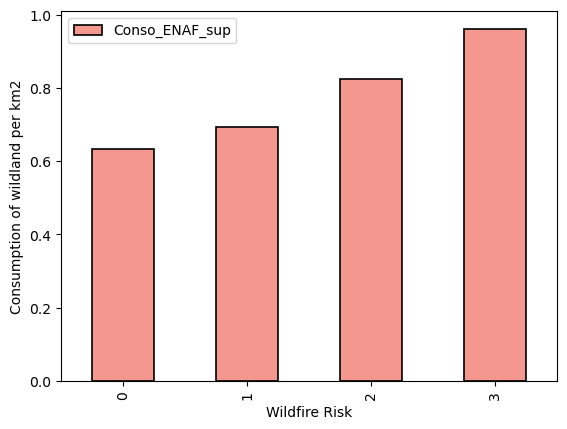

In [59]:
df_plot = df[['wf_risk', 'Population', 'Superficie', 'Cat', 'Cat_sup', 'Cat_pop', 'Conso_ENAF_sup', 'densite']]
df_plot['decile_wf'] = pd.qcut(df_plot['wf_risk'], 10, labels=False, duplicates='drop')
df_plot = df_plot.groupby('decile_wf').mean()

df_plot.plot(y='Conso_ENAF_sup', kind='bar', color='#f4978e', edgecolor='black', linewidth=1.2)
plt.ylabel('Consumption of wildland per km2')
plt.xlabel('Wildfire Risk')